In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10**6

In [3]:
ip1 = np.random.rand(N) > 0.5
ip1 = ip1.astype(int)

In [4]:
ip2 = np.random.rand(N) > 0.5
ip2 = ip1.astype(int)

In [5]:
s = (1/np.sqrt(2)) * ((2*ip1 - 1) + 1j*(2*ip2 - 1))

In [6]:
eb_no_db = np.arange(0,30)

In [7]:
bit_error_SC = np.zeros(len(eb_no_db))
bit_error_EGC = np.zeros(len(eb_no_db))
bit_error_MRC = np.zeros(len(eb_no_db))
bit_error_MISO = np.zeros(len(eb_no_db))
bit_error_ALAMOUTI = np.zeros(len(eb_no_db))

In [8]:
def SC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits_real = []
        
        equalize_bits_imag = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n12 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            x = s[ii]
            
            y1 = np.dot(h11, x) + n11 * (10 ** (-eb_no_db[jj] / 20))
            
            y2 = np.dot(h21, x) + n21 * (10 ** (-eb_no_db[jj] / 20))
            
            y3 = np.dot(h12, x) + n12 * (10 ** (-eb_no_db[jj] / 20))
            
            y4 = np.dot(h22, x) + n22 * (10 ** (-eb_no_db[jj] / 20))
            
            h11_gain = np.abs(h11)
            
            h21_gain = np.abs(h21)
            
            h12_gain = np.abs(h12)
            
            h22_gain = np.abs(h22)
            
            max_gain = max(h11_gain, h21_gain, h12_gain, h22_gain)
            
            if max_gain == h11_gain:
                
                transmitted_channel = h11
                
                received_signal = y1
                
                received_signal = y1/transmitted_channel
                
                w_real = np.real(received_signal) > 0
                
                equalize_bits_real.append(w_real)
                
                w_imag =  np.imag(received_signal) > 0
                
                equalize_bits_imag.append(w_imag)
                
            elif max_gain == h21_gain:
        
                transmitted_channel = h21
            
                received_signal = y2
                
                received_signal = y2/transmitted_channel
                
                w_real = np.real(received_signal) > 0
                
                equalize_bits_real.append(w_real)
                
                w_imag =  np.imag(received_signal) > 0
                
                equalize_bits_imag.append(w_imag)
                
            elif max_gain == h12_gain:
        
                transmitted_channel = h12
            
                received_signal = y3
                
                received_signal = y3/transmitted_channel
                
                w_real = np.real(received_signal) > 0
                
                equalize_bits_real.append(w_real)
                
                w_imag =  np.imag(received_signal) > 0
                
                equalize_bits_imag.append(w_imag)
                
            elif max_gain == h22_gain:
        
                transmitted_channel = h22
            
                received_signal = y4
                
                received_signal = y4/transmitted_channel
                
                w_real = np.real(received_signal) > 0
                
                equalize_bits_real.append(w_real)
                
                w_imag =  np.imag(received_signal) > 0
                
                equalize_bits_imag.append(w_imag)
            
            
                

        nErr1 = np.sum(ip1 != equalize_bits_real)
    
        nErr2 = np.sum(ip2 != equalize_bits_imag)
        
        nErr = nErr1 + nErr2
        
        bit_error_SC[jj] = nErr/N
        
    return bit_error_SC

In [9]:
def EGC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits_real = []
        
        equalize_bits_imag = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n22 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            x = s[ii]
            
            y1 = np.dot(h11, x) + n11 * (10 ** (-eb_no_db[jj] / 20))
            
            
            
            y2 = np.dot(h21, x) + n21 * (10 ** (-eb_no_db[jj] / 20))
            
            
            y3 = np.dot(h12, x) + n12 * (10 ** (-eb_no_db[jj] / 20))
            
            y4 = np.dot(h22, x) + n22 * (10 ** (-eb_no_db[jj] / 20))
            
            
            
            y1_hat = np.divide(y1, np.exp(1j*np.angle(h11)))
            
            y2_hat = np.divide(y2, np.exp(1j*np.angle(h21)))
            
            y3_hat = np.divide(y3, np.exp(1j*np.angle(h12)))
            
            y4_hat = np.divide(y4, np.exp(1j*np.angle(h22)))
            
            y = y1_hat + y2_hat + y3_hat + y4_hat
            
            w = np.real(y) > 0
            
            w_imag = np.imag(y)>0
            
            
            equalize_bits_real.append(w)
            
            equalize_bits_imag.append(w_imag)
            
        nErr1 = np.sum(ip1 != equalize_bits_real)
        
        nErr2 = np.sum(ip2 != equalize_bits_imag)
        
        nErr = nErr1 + nErr2
        
        bit_error_EGC[jj] = nErr / N

    return bit_error_EGC

In [10]:
def MRC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits_real = []
        
        equalize_bits_imag = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n22 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            H = np.array([[h11], [h12], [h21], [h22]])
            
            n = np.array([[n11], [n12], [n21], [n22]])
            
            
            x = s[ii]
            
            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            hermitian_H = np.conjugate(H)
            
            hermitian_H = np.transpose(hermitian_H)
            
            magnitude_H = np.dot(hermitian_H,H)
            
            x_tilde = np.divide(np.dot(hermitian_H,y),magnitude_H)
            
            w_real = np.real(x_tilde) > 0
            
            w_real =w_real[0,0].astype(int)
            
            equalize_bits_real.append(w_real)
            
            w_imag = np.imag(x_tilde) > 0
            
            w_imag = w_imag[0,0].astype(int)
            
            equalize_bits_imag.append(w_imag)    
            
            
        nErr1 = np.sum(ip1 != equalize_bits_real)
        
        nErr2 = np.sum(ip2 != equalize_bits_imag)
        
        nErr = nErr1 + nErr2
        
        bit_error_MRC[jj] = nErr/N
        
    return bit_error_MRC

In [11]:
def MISO():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits_real = []
        
        equalize_bits_imag = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n22 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            H = np.array([[h11], [h12], [h21], [h22]])
            
            n = np.array([[n11], [n12], [n21], [n22]])
            
            x = s[ii]
            
            y = (1/np.sqrt(2)) *  np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_inverse = np.linalg.pinv(H)
            
            W = np.dot(H_inverse,y)
            
            
            
            
        
            W_real = np.real(W) > 0
            
            
            
            W_imag = np.imag(W) > 0
            
            
            
            equalize_bits_real.append(W_real[0,0])
            
            equalize_bits_imag.append(W_imag[0,0])
            
            
            
        nErr1 = np.sum(ip1 != equalize_bits_real)
        
        nErr2 = np.sum(ip2 != equalize_bits_imag )
        
        nErr = nErr1 + nErr2
       
        bit_error_MISO[jj] = nErr/ N
        
        
        
    return bit_error_MISO

In [12]:
def alamouti_2Tx_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        total_error = 0
        
        equalize_bits_real_s0 =[]
        
        equalize_bits_imag_s0 = []
        
        equalize_bits_real_s1 = []
        
        equalize_bits_imag_s1 = []
        
        for ii in range(N // 2):
            
            h0 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h3 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n0 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n3 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            s0 = s[2 * ii]
            
            s1 = s[2 * ii + 1]
            
            r0 = h0 * (1 / np.sqrt(2)) * s0 + h1 * (1 / np.sqrt(2)) * s1 + n0 * 10 ** (-eb_no_db[jj] / 20)
            
            r1 = - h0 * (1 / np.sqrt(2)) * np.conj(s1) + h1 * np.conj(s0) + n1 * 10 ** (-eb_no_db[jj] / 20)
            
            r2 = h2 * (1 / np.sqrt(2)) * s0 + h3 * (1 / np.sqrt(2)) * s1 + n2 * 10 ** (-eb_no_db[jj] / 20)
            
            r3 = -h2 * (1 / np.sqrt(2)) * np.conj(s1) + h3 * (1 / np.sqrt(2)) * np.conj(s0) + n3 * 10 ** (-eb_no_db[jj] / 20)
            
            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1) + np.conj(h2) * r2 + h3 * np.conj(r3)
            
            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1) + np.conj(h3) * r2 - h2 * np.conj(r3)
            
            s0_tilde = s0_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            s1_tilde = s1_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            s0_real = np.real(s0_tilde) > 0
            
            equalize_bits_real_s0.append(s0_real)
            
            s0_imag = np.imag(s0_tilde) > 0
            
            equalize_bits_imag_s0.append(s0_imag)
            
            s1_real = np.real(s1_tilde) > 0
            
            equalize_bits_real_s1.append(s1_real)
            
            s1_imag = np.imag(s1_tilde) > 0
            
            equalize_bits_imag_s1.append(s1_imag)
            
            nErr1 = np.sum(ip1[2*ii] != s0_real )
            
            total_error = total_error + nErr1

            nErr2 = np.sum(ip1[2*ii + 1] != s1_real)
            
            total_error = total_error + nErr2
            
            nErr3 = np.sum(ip2[2*ii] != s0_imag)
            
            total_error = total_error + nErr3
            
            nErr4 = np.sum(ip2[2*ii + 1] != s1_imag)
            
            total_error = total_error + nErr4
            
        bit_error_ALAMOUTI[jj] = total_error / N
        
    return bit_error_ALAMOUTI

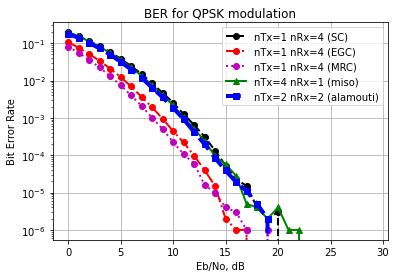

In [13]:
sc = SC()

egc = EGC()

mrc = MRC()

miso = MISO()

alamouti_2Rx = alamouti_2Tx_2Rx()

plt.figure()
plt.semilogy(eb_no_db, sc, 'ko--', linewidth=2, markersize=6, label='nTx=1 nRx=4 (SC)')
plt.semilogy(eb_no_db, egc, 'ro-.', linewidth=2, markersize=6, label='nTx=1 nRx=4 (EGC)')
plt.semilogy(eb_no_db, mrc, 'mo:', linewidth=2, markersize=6, label='nTx=1 nRx=4 (MRC)')
plt.semilogy(eb_no_db, miso, 'g^-', linewidth=2, markersize=6, label='nTx=4 nRx=1 (miso)')
plt.semilogy(eb_no_db, alamouti_2Rx, 'bs--', linewidth=4, markersize=6, label='nTx=2 nRx=2 (alamouti)')
plt.legend()
plt.grid(True)
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for QPSK modulation')
plt.show()